In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-colorblind')
%matplotlib inline

C:\Users\Admin\AppData\Local\Temp\ipykernel_15128\4195980180.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


# Xác định kiểu dữ liệu của từng biến
Định nghĩa:
Bất kỳ thuộc tính/đặc tính có thể đo lường nào của một hiện tượng đang được quan sát. Chúng được gọi là 'biến số' vì giá trị mà chúng nhận có thể khác nhau (và thường là như vậy) trong một quần thể.


<table>
<tr>
<td><b>Kiểu</b></td> <td> <b>Sub-type</b></td> <td> <b>Định nghĩa</b> </td> <td> <b> Ví dụ </b></td>
</tr>
<tr>
<td>Categorical</td> 
<td>Nominal</td> 
<td>Các dữ liệu không theo tự nhiên hay quy tắc nào </td> 
<td>loại xe </td> 
</tr>
<tr>
<td></td> 
<td>Ordinal</td> 
<td>Một biến phân loại có thể được sắp xếp theo thứ tự có ý nghĩa.</td> 
<td>Xếp hạng kiểm tra</td> 
</tr>
<tr>
<td>Numerical</td> 
<td>Discreate</td> 
<td>Các biến có giá trị là hữu hạn hoặc vô hạn đếm được</td> 
<td>Số lượng người trong gia đình</td> 
</tr>
<tr>
<td></td> 
<td>Continuous</td> 
<td>Biến có thể nhận vô số giá trị không đếm được.      </td> 
<td>Giá nhà</td> 
</tr>
</table>

In [3]:
df = pd.read_csv('../dataset/titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Xác định những cột sử dụng để phân tích

In [5]:
use_cols = ['Pclass', 'Sex', 'Age','Fare','SibSp', 
            'Survived']

data = df[use_cols]

In [6]:
def describe(data,output_path=None):
    """output the general description of a  pandas Dataframe
       into a csv file
    
    """
    
    result = data.describe(include='all')
    if output_path is not None:
        output = os.path.join(output_path,'describe.csv')
        result.to_csv(output)
        print('result saved at:', str(output))
    return result
    

In [8]:
describe(data)

,Pclass,Sex,Age,Fare,SibSp,Survived
count,891.000000,891,714.000000,891.000000,891.000000,891.000000
unique,NaN,2,NaN,NaN,NaN,NaN
top,NaN,male,NaN,NaN,NaN,NaN
freq,NaN,577,NaN,NaN,NaN,NaN
mean,2.308642,NaN,29.699118,32.204208,0.523008,0.383838
std,0.836071,NaN,14.526497,49.693429,1.102743,0.486592
min,1.000000,NaN,0.420000,0.000000,0.000000,0.000000
25%,2.000000,NaN,20.125000,7.910400,0.000000,0.000000
50%,3.000000,NaN,28.000000,14.454200,0.000000,0.000000
75%,3.000000,NaN,38.000000,31.000000,1.000000,1.000000


In [11]:
def discrete_var_barplot(x,y,data,output_path=None):
    """draw the barplot of a discrete variable x against y(target variable). 
    By default the bar shows the mean value of y.

    Parameters
    ----------


    Returns
    -------
    figure save as PNG
    """
    
    plt.figure(figsize=(15,10))
    sns.barplot(x=x,y=y,data=data)
    if output_path is not None:
        output = os.path.join(output_path,'Barplot_'+str(x)+'_'+str(y)+'.png')
        plt.savefig(output)   
        print('Image saved at', str(output))

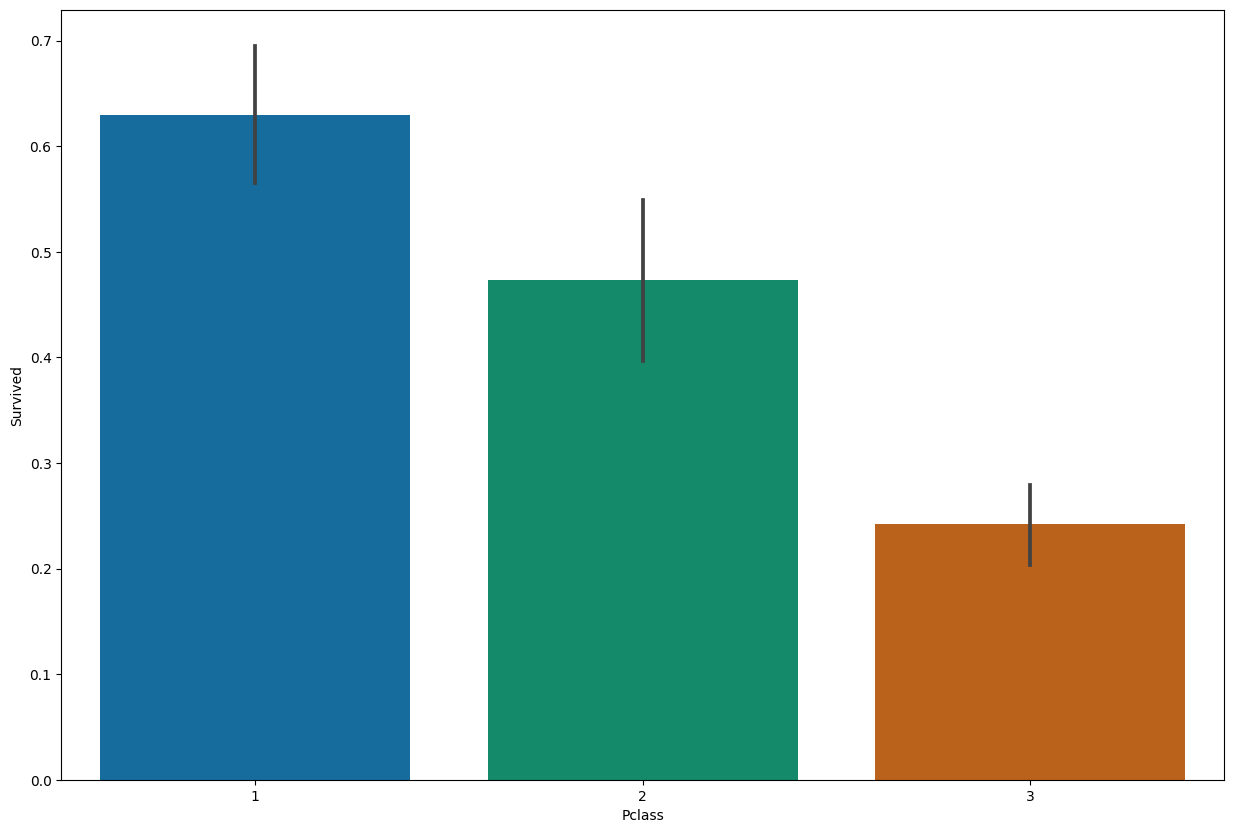

In [12]:
discrete_var_barplot(data['Pclass'], data['Survived'], data)